In [ ]:
# If the skmultiflow is not installed, please uncomment the code below

#pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

### Imports

In [1]:
from skmultiflow.data import HyperplaneGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.lazy import KNNClassifier
from skmultiflow.bayes import NaiveBayes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time

import warnings
warnings.filterwarnings("ignore")

# Work to be Done

## 1. Dataset Generation

In [2]:
# Generate Hyperplane dataset with 20,000 instance (10 features and a label)

hyperplane_dataset_1 = HyperplaneGenerator(random_state=890, n_features=10, noise_percentage=0)
hyperplane_dataset_1.prepare_for_use()
X, Y = hyperplane_dataset_1.next_sample(20000)
data = pd.DataFrame(np.hstack((X, np.array([Y]).T)))
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.544973,0.136044,0.026597,0.826755,0.844116,0.609194,0.249965,0.173300,0.020475,0.064433,0.0
1,0.057770,0.410093,0.530724,0.395047,0.838492,0.466994,0.354566,0.671094,0.199478,0.645635,0.0
2,0.899824,0.260812,0.304893,0.992188,0.966578,0.785798,0.191072,0.194729,0.445615,0.240992,1.0
3,0.173040,0.542823,0.151718,0.526994,0.668003,0.661134,0.568912,0.644658,0.638315,0.683778,1.0
4,0.874571,0.459224,0.744191,0.815678,0.152806,0.015684,0.594759,0.765256,0.874106,0.784010,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.791991,0.721054,0.527357,0.306207,0.503294,0.536983,0.328190,0.008763,0.074740,0.348050,0.0
19996,0.590742,0.374834,0.120398,0.768424,0.528010,0.899820,0.313605,0.121674,0.201746,0.937506,1.0
19997,0.546814,0.278311,0.907759,0.163534,0.490046,0.102152,0.886286,0.520835,0.656903,0.519200,0.0
19998,0.222909,0.946849,0.393739,0.385399,0.746643,0.394023,0.677282,0.847235,0.630952,0.778475,1.0


### 1.a. Hyperplane Dataset (noise= 10%, number of drifting features 2)

In [2]:
hyperplane_dataset_1_a = HyperplaneGenerator(random_state=888, n_features=10, n_drift_features=2 ,noise_percentage=0.10)
hyperplane_dataset_1_a.prepare_for_use()
x_1_a, y_1_a = hyperplane_dataset_1_a.next_sample(20000)
data_1_a = pd.DataFrame(np.hstack((x_1_a, np.array([y_1_a]).T)))
data_1_a

,0,1,2,3,4,5,6,7,8,9,10
0,0.899478,0.248365,0.030172,0.072447,0.874164,0.558430,0.916047,0.633460,0.283253,0.365369,1.0
1,0.705171,0.648509,0.040909,0.211732,0.001490,0.138972,0.211825,0.026095,0.446087,0.239105,0.0
2,0.091587,0.977452,0.411501,0.458305,0.525909,0.294416,0.972116,0.181444,0.303406,0.174454,0.0
3,0.635272,0.496203,0.014126,0.627222,0.634975,0.108141,0.829643,0.517752,0.570683,0.546333,1.0
4,0.450078,0.876507,0.537356,0.495684,0.418272,0.851006,0.386853,0.606895,0.217841,0.912944,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.948650,0.485057,0.397131,0.450677,0.532419,0.207320,0.108824,0.875667,0.750174,0.091698,1.0
19996,0.442647,0.067846,0.403646,0.202704,0.085193,0.183511,0.586784,0.777532,0.978976,0.012463,0.0
19997,0.214319,0.774101,0.717450,0.338712,0.172461,0.553859,0.654631,0.804498,0.716806,0.714264,1.0
19998,0.372054,0.699841,0.360458,0.461629,0.774082,0.984725,0.289132,0.360727,0.116030,0.757635,0.0


In [3]:
# Write the dataset into a file called Hyperplane Dataset 10_2
data_1_a.to_csv("Hyperplane Dataset 10_2.csv", header=["f1", "f2", "f3", "f4", "f5", "f6", "f7", "f8", "f9", "f10", "y"], index=False)

### 1.b. Hyperplane Dataset (noise= 30%, number of drifting features 2)

In [4]:
hyperplane_dataset_1_b = HyperplaneGenerator(random_state=887, n_features=10, n_drift_features=2, noise_percentage=0.30)
hyperplane_dataset_1_b.prepare_for_use()
x_1_b, y_1_b = hyperplane_dataset_1_b.next_sample(20000)
data_1_b = pd.DataFrame(np.hstack((x_1_b, np.array([y_1_b]).T)))
data_1_b

,0,1,2,3,4,5,6,7,8,9,10
0,0.743927,0.053853,0.602074,0.429319,0.205474,0.548648,0.384761,0.457886,0.281633,0.585246,0.0
1,0.239392,0.828081,0.956683,0.909764,0.775712,0.464015,0.373378,0.951901,0.895879,0.476401,1.0
2,0.659155,0.191030,0.695099,0.311044,0.421201,0.512675,0.175402,0.995717,0.164794,0.299306,1.0
3,0.598967,0.477178,0.000518,0.246747,0.519908,0.593825,0.711397,0.925769,0.700992,0.792368,1.0
4,0.808011,0.165505,0.256827,0.675300,0.874263,0.594933,0.946057,0.300904,0.806030,0.130000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.243542,0.845060,0.906268,0.370992,0.442643,0.210304,0.436489,0.723493,0.536403,0.101306,0.0
19996,0.468871,0.654791,0.016860,0.584375,0.113910,0.803694,0.122719,0.189614,0.125332,0.344963,0.0
19997,0.603137,0.606514,0.423596,0.405022,0.658217,0.079708,0.690362,0.172014,0.356757,0.017971,1.0
19998,0.017391,0.751746,0.239900,0.958502,0.676682,0.464312,0.042739,0.515920,0.994936,0.775286,0.0


### 1.c. Hyperplane Dataset (noise= 10%, number of drifting features 5)

In [5]:
hyperplane_dataset_1_c = HyperplaneGenerator(random_state=886, n_features=10, n_drift_features=5, noise_percentage=0.1)
hyperplane_dataset_1_c.prepare_for_use()
x_1_c, y_1_c = hyperplane_dataset_1_c.next_sample(20000)
data_1_c = pd.DataFrame(np.hstack((x_1_c, np.array([y_1_c]).T)))
data_1_c

,0,1,2,3,4,5,6,7,8,9,10
0,0.848792,0.447411,0.813492,0.201134,0.788237,0.745566,0.444688,0.680866,0.137615,0.868325,1.0
1,0.819547,0.082162,0.649074,0.408441,0.444860,0.782632,0.305221,0.212106,0.656394,0.438973,0.0
2,0.187147,0.005213,0.135903,0.280797,0.083665,0.174512,0.489846,0.946122,0.019780,0.584287,1.0
3,0.823329,0.005809,0.224312,0.917193,0.788180,0.090277,0.205849,0.457704,0.816957,0.336621,0.0
4,0.867101,0.627878,0.714713,0.041098,0.257739,0.432509,0.654784,0.259098,0.087866,0.724138,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.250384,0.645341,0.961901,0.793571,0.283793,0.823874,0.699558,0.861503,0.993210,0.701025,1.0
19996,0.769374,0.692736,0.544272,0.025412,0.552646,0.149542,0.493279,0.927607,0.073232,0.627548,0.0
19997,0.214810,0.572602,0.395636,0.607904,0.136162,0.819241,0.486460,0.206172,0.694557,0.265713,0.0
19998,0.093793,0.472491,0.923123,0.230273,0.038932,0.057095,0.453836,0.997957,0.149361,0.555966,0.0


### 1.d. Hyperplane Dataset (noise= 30%, number of drifting features 5)

In [6]:
hyperplane_dataset_1_d = HyperplaneGenerator(random_state=886, n_features=10, n_drift_features=5, noise_percentage=0.30)
hyperplane_dataset_1_d.prepare_for_use()
x_1_d, y_1_d = hyperplane_dataset_1_d.next_sample(20000)
data_1_d = pd.DataFrame(np.hstack((x_1_d, np.array([y_1_d]).T)))
data_1_d

,0,1,2,3,4,5,6,7,8,9,10
0,0.848792,0.447411,0.813492,0.201134,0.788237,0.745566,0.444688,0.680866,0.137615,0.868325,1.0
1,0.819547,0.082162,0.649074,0.408441,0.444860,0.782632,0.305221,0.212106,0.656394,0.438973,0.0
2,0.187147,0.005213,0.135903,0.280797,0.083665,0.174512,0.489846,0.946122,0.019780,0.584287,1.0
3,0.823329,0.005809,0.224312,0.917193,0.788180,0.090277,0.205849,0.457704,0.816957,0.336621,0.0
4,0.867101,0.627878,0.714713,0.041098,0.257739,0.432509,0.654784,0.259098,0.087866,0.724138,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.250384,0.645341,0.961901,0.793571,0.283793,0.823874,0.699558,0.861503,0.993210,0.701025,1.0
19996,0.769374,0.692736,0.544272,0.025412,0.552646,0.149542,0.493279,0.927607,0.073232,0.627548,0.0
19997,0.214810,0.572602,0.395636,0.607904,0.136162,0.819241,0.486460,0.206172,0.694557,0.265713,1.0
19998,0.093793,0.472491,0.923123,0.230273,0.038932,0.057095,0.453836,0.997957,0.149361,0.555966,0.0


## 2. Data Stream Classification with Three Separate Online Single Classifiers: HT, KNN, MLP

In [8]:
hyper_plane_datasets = [hyperplane_dataset_1_a, hyperplane_dataset_1_b, hyperplane_dataset_1_c, hyperplane_dataset_1_d]

### 2.a. HoeffdingTree as HT online learner

In [9]:
# Create the HoeffdingTree as HT online learner 
ht = HoeffdingTreeClassifier()

max_samples_array = [1000, 5000, 10000, 20000]
best_accuracies = []

for i in range(4):
    n_samples = 0
    correct_cnt = 0

    for max_samples in max_samples_array:
        best_accuracy = 0
        while n_samples < max_samples and hyper_plane_datasets[i].has_more_samples():
            X, y = hyper_plane_datasets[i].next_sample()
            y_pred = ht.predict(X)
            if y[0] == y_pred[0]:
                correct_cnt += 1
            ht = ht.partial_fit(X, y)
            n_samples += 1
        
        acc = correct_cnt / n_samples
        
        if acc > best_accuracy:
            best_accuracy = acc

        print('{} samples for analysis.'.format(n_samples))
        print('When max sample size = {}, accuracy of hyperplane dataset number {} : {}'.format(max_samples, i, acc))
    best_accuracies.append(best_accuracy)
    print()

1000 samples for analysis.
When max sample size = 1000, accuracy of hyperplane dataset number 0 : 0.842
5000 samples for analysis.
When max sample size = 5000, accuracy of hyperplane dataset number 0 : 0.8514
10000 samples for analysis.
When max sample size = 10000, accuracy of hyperplane dataset number 0 : 0.845
20000 samples for analysis.
When max sample size = 20000, accuracy of hyperplane dataset number 0 : 0.848

1000 samples for analysis.
When max sample size = 1000, accuracy of hyperplane dataset number 1 : 0.593
5000 samples for analysis.
When max sample size = 5000, accuracy of hyperplane dataset number 1 : 0.6156
10000 samples for analysis.
When max sample size = 10000, accuracy of hyperplane dataset number 1 : 0.6224
20000 samples for analysis.
When max sample size = 20000, accuracy of hyperplane dataset number 1 : 0.63185

1000 samples for analysis.
When max sample size = 1000, accuracy of hyperplane dataset number 2 : 0.714
5000 samples for analysis.
When max sample size =

#### Try different batch sizes for HT

In [10]:
batch_sizes = [1, 100, 1000]
time_for_batch = []

# For every dataset
batch_acc = []
batch_time = []

for batch_size in batch_sizes:
    n_samples = 0
    correct_cnt = 0
    start_time = time.time()
    while n_samples < 20000:
        X, y = hyperplane_dataset_1_a.next_sample(batch_size)
        y_pred = ht.predict(X)

        for k in range(batch_size):
            if y[k] == y_pred[k]:
                correct_cnt += 1

        ht = ht.partial_fit(X, y)
        n_samples += batch_size

    elapsed_time = (time.time() - start_time)
    acc = correct_cnt / n_samples
    batch_acc.append(acc)
    batch_time.append(elapsed_time)
    print("Time it takes to train HT when batch_size is {}, accuracy is {}".format(elapsed_time, acc))
    


Time it takes to train HT when batch_size is 3.8209917545318604, accuracy is 0.7772
Time it takes to train HT when batch_size is 3.2900524139404297, accuracy is 0.83445
Time it takes to train HT when batch_size is 3.262397050857544, accuracy is 0.8473


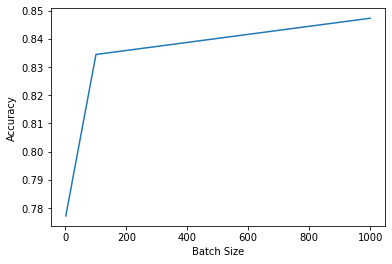

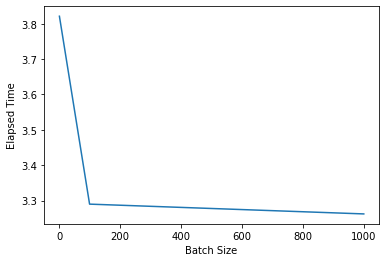

In [11]:
plt.figure(1)
plt.plot([1, 100, 1000], batch_acc)
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.show()

plt.figure(2)
plt.plot([1, 100, 1000], batch_time)
plt.xlabel("Batch Size")
plt.ylabel("Elapsed Time")
plt.show()

[0.848, 0.63185, 0.80075, 0.65515]


Text(0.5, 1.0, 'Best accuracies obtained by HT online learner')

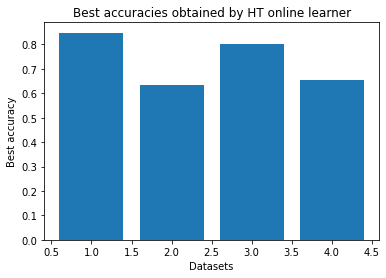

In [12]:
print(best_accuracies)

x = [1, 2, 3, 4]

plt.bar(x, best_accuracies)
plt.xlabel("Datasets")
plt.ylabel("Best accuracy")
plt.title("Best accuracies obtained by HT online learner")

### 2.b. K nearest neighbour as KNN online learner,

In [13]:
number_of_neighbors = [5, 7, 10, 15]
max_windows_sizes = [1000, 2000, 5000, 10000]

best_accuracies_knn = []

for i, hyperplane_dataset in enumerate(hyper_plane_datasets):
    best_accuracy_knn = 0
    for n_neighbor in number_of_neighbors:
        for max_window_size in max_windows_sizes:
            knn = KNNClassifier(n_neighbors=n_neighbor, max_window_size=max_window_size, leaf_size=40)

            n_samples = 0
            corrects = 0
            while n_samples < 5000 and hyperplane_dataset.has_more_samples:
                X, y = hyperplane_dataset.next_sample()
                my_pred = knn.predict(X)
                if y[0] == my_pred[0]:
                    corrects += 1
                knn = knn.partial_fit(X, y)
                n_samples += 1
            
            acc = corrects / n_samples
            
            if acc > best_accuracy_knn:
                best_accuracy_knn = acc
            
            print("Accuracy when max_window_size = {}, number of neighbors = {}, in the hyperplane dataset number {} is {}".format(max_window_size, n_neighbor, i, acc))
        print()
    print()
    best_accuracies_knn.append(best_accuracy_knn)
                

Accuracy when max_window_size = 1000, number of neighbors = 5, in the hyperplane dataset number 0 is 0.7716
Accuracy when max_window_size = 2000, number of neighbors = 5, in the hyperplane dataset number 0 is 0.7686
Accuracy when max_window_size = 5000, number of neighbors = 5, in the hyperplane dataset number 0 is 0.7774
Accuracy when max_window_size = 10000, number of neighbors = 5, in the hyperplane dataset number 0 is 0.7692

Accuracy when max_window_size = 1000, number of neighbors = 7, in the hyperplane dataset number 0 is 0.782
Accuracy when max_window_size = 2000, number of neighbors = 7, in the hyperplane dataset number 0 is 0.796
Accuracy when max_window_size = 5000, number of neighbors = 7, in the hyperplane dataset number 0 is 0.7914
Accuracy when max_window_size = 10000, number of neighbors = 7, in the hyperplane dataset number 0 is 0.7994

Accuracy when max_window_size = 1000, number of neighbors = 10, in the hyperplane dataset number 0 is 0.7846
Accuracy when max_window_

[0.8212, 0.6304, 0.8354, 0.6266]


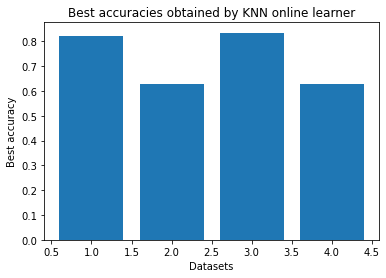

In [14]:
print(best_accuracies_knn)

plt.figure()
plt.bar(x, best_accuracies_knn)
plt.xlabel("Datasets")
plt.ylabel("Best accuracy")
plt.title("Best accuracies obtained by KNN online learner")
plt.show()



#### Try different batch sizes for KNN

In [15]:
batch_sizes = [1, 100, 1000]

batch_acc = []
batch_time = []

knn = KNNClassifier(n_neighbors=15, max_window_size=5000, leaf_size=40)

for batch_size in batch_sizes:
    n_samples = 0
    correct_cnt = 0
    start_time = time.time()
    while n_samples < 20000:
        X, y = hyperplane_dataset_1_a.next_sample(batch_size)
        y_pred = knn.predict(X)

        for k in range(batch_size):
            if y[k] == y_pred[k]:
                correct_cnt += 1

        knn = knn.partial_fit(X, y)
        n_samples += batch_size

    elapsed_time = (time.time() - start_time)
    acc = correct_cnt / n_samples
    batch_acc.append(acc)
    batch_time.append(elapsed_time)
    print("Time it takes to train KNN when batch_size is {}, accuracy is {}".format(elapsed_time, acc))

Time it takes to train KNN when batch_size is 109.75455689430237, accuracy is 0.8333
Time it takes to train KNN when batch_size is 3.631375312805176, accuracy is 0.8338
Time it takes to train KNN when batch_size is 2.658583641052246, accuracy is 0.82865


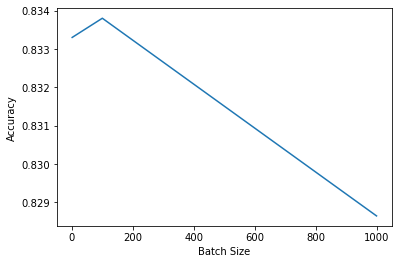

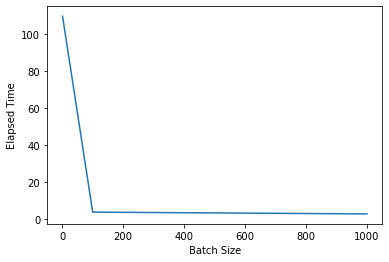

In [16]:
plt.figure(1)
plt.plot([1, 100, 1000], batch_acc)
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.show()

plt.figure(2)
plt.plot([1, 100, 1000], batch_time)
plt.xlabel("Batch Size")
plt.ylabel("Elapsed Time")
plt.show()

### 2.c. Naïve Bayes as NB online learner

In [17]:
max_samples = [200, 500, 1000, 2000, 5000, 10000]
best_accuracies_nb = []

for i, hyperplane_dataset in enumerate(hyper_plane_datasets):
    best_accuracy_nb = 0
    for max_sample in max_samples:
        n_samples = 0
        correct_cnt = 0
        naive_bayes = NaiveBayes()
        while n_samples < max_sample and hyperplane_dataset.has_more_samples():
            X, y = hyperplane_dataset.next_sample()
            y_pred = naive_bayes.predict(X)
            if y[0] == y_pred[0]:
                correct_cnt += 1
            naive_bayes.partial_fit(X, y)
            n_samples += 1
        
        acc = correct_cnt / n_samples
        if acc > best_accuracy_nb:
            best_accuracy_nb = acc
        
        print('Naive Bayes accuracy when max_samples is {} for the hyperplane dataset number {} is {}'.format(max_sample, i, acc))
    
    best_accuracies_nb.append(best_accuracy_nb)
    print()

Naive Bayes accuracy when max_samples is 200 for the hyperplane dataset number 0 is 0.755
Naive Bayes accuracy when max_samples is 500 for the hyperplane dataset number 0 is 0.768
Naive Bayes accuracy when max_samples is 1000 for the hyperplane dataset number 0 is 0.843
Naive Bayes accuracy when max_samples is 2000 for the hyperplane dataset number 0 is 0.832
Naive Bayes accuracy when max_samples is 5000 for the hyperplane dataset number 0 is 0.867
Naive Bayes accuracy when max_samples is 10000 for the hyperplane dataset number 0 is 0.8756

Naive Bayes accuracy when max_samples is 200 for the hyperplane dataset number 1 is 0.58
Naive Bayes accuracy when max_samples is 500 for the hyperplane dataset number 1 is 0.628
Naive Bayes accuracy when max_samples is 1000 for the hyperplane dataset number 1 is 0.651
Naive Bayes accuracy when max_samples is 2000 for the hyperplane dataset number 1 is 0.637
Naive Bayes accuracy when max_samples is 5000 for the hyperplane dataset number 1 is 0.6662


[0.8756, 0.684, 0.8785, 0.6837]


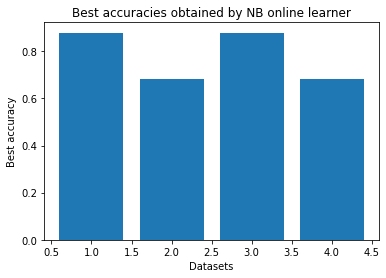

In [18]:
plt.bar([1,2,3,4], best_accuracies_nb)
plt.xlabel("Datasets")
plt.ylabel("Best accuracy")
plt.title("Best accuracies obtained by NB online learner")

print(best_accuracies_nb)

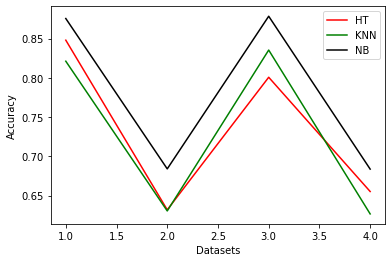

In [19]:
plt.plot(x, best_accuracies, 'r', label="HT")
plt.plot(x, best_accuracies_knn, 'g', label="KNN")
plt.plot(x, best_accuracies_nb, 'k', label="NB")
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Try different batch sizes for NB

In [20]:
batch_sizes = [1, 100, 1000]

batch_acc = []
batch_time = []

for batch_size in batch_sizes:
    n_samples = 0
    correct_cnt = 0
    start_time = time.time()
    naive_bayes = NaiveBayes()
    while n_samples < 20000:
        X, y = hyperplane_dataset_1_a.next_sample(batch_size)
        y_pred = naive_bayes.predict(X)

        for k in range(batch_size):
            if y[k] == y_pred[k]:
                correct_cnt += 1

        naive_bayes.partial_fit(X, y)
        n_samples += batch_size

    elapsed_time = (time.time() - start_time)
    acc = correct_cnt / n_samples
    batch_acc.append(acc)
    batch_time.append(elapsed_time)
    print("Time it takes to train HT when batch_size is {}, accuracy is {}".format(elapsed_time, acc))

Time it takes to train HT when batch_size is 2.1096837520599365, accuracy is 0.8799
Time it takes to train HT when batch_size is 1.5480999946594238, accuracy is 0.88465
Time it takes to train HT when batch_size is 1.5008995532989502, accuracy is 0.86955


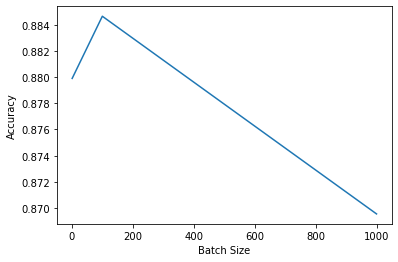

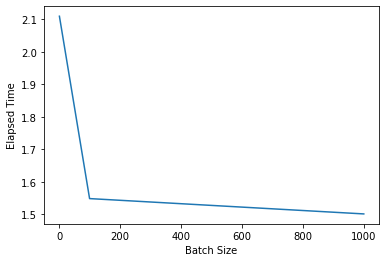

In [21]:
plt.figure(1)
plt.plot([1, 100, 1000], batch_acc)
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.show()

plt.figure(2)
plt.plot([1, 100, 1000], batch_time)
plt.xlabel("Batch Size")
plt.ylabel("Elapsed Time")
plt.show()

## 3. Data Stream Classification with Two Online Ensemble Classifiers: MV, WMV

### 3.a. Majority voting rule MV,

In [46]:
def MajorityVotingClassifier(data_x, data_y):
    # First, initialize the classifiers
    ht = HoeffdingTreeClassifier()
    knn = KNNClassifier(n_neighbors=15, max_window_size=5000, leaf_size=40)
    nb = NaiveBayes()

    # Separate the dataset into train and test sets (ratio is 80:20)
    train_x_1_a = data_x[:16000]
    test_x_1_a = data_x[16000:]

    train_y_1_a = data_y[:16000]
    test_y_1_a = data_y[16000:]

    # Second, fit the classifiers with the first dataset's training set
    ht.fit(train_x_1_a, train_y_1_a)
    knn.fit(train_x_1_a, train_y_1_a)
    nb.fit(train_x_1_a, train_y_1_a)

    # Make predictions by using the three classifiers
    ht_prediction = ht.predict(test_x_1_a)
    knn_prediction = knn.predict(test_x_1_a)
    nb_prediction = nb.predict(test_x_1_a)
    
    majority_predictions = []

    # Select the prediction with the highest frequency as the final prediction
    for i in range(4000): # There are 4000 predictions
        one_count = 0
        zero_count = 0

        if ht_prediction[i] == 0:
            zero_count += 1
        else:
            one_count += 1

        if knn_prediction[i] == 0:
            zero_count += 1
        else:
            one_count += 1

        if nb_prediction[i] == 0:
            zero_count += 1
        else:
            one_count += 1

        if zero_count > one_count:
            majority_predictions.append(0)
        else:
            majority_predictions.append(1)    

    majority_predictions = np.array(majority_predictions)
    
    # Calculate the accuracy
    correct_count = 0
    for i in range(4000):
        if majority_predictions[i] == test_y_1_a[i]:
            correct_count += 1
    
    return correct_count / 4000 * 100

In [54]:
ensemble_accuracies = []

#### MV for the first dataset

In [55]:
acc = MajorityVotingClassifier(x_1_a, y_1_a)
print(f"With the first dataset, Accuracy of the majority voting rule is: {acc:.2f}%")
ensemble_accuracies.append(acc)

With the first dataset, Accuracy of the majority voting rule is: 88.72%


#### MV for the second dataset

In [56]:
acc = MajorityVotingClassifier(x_1_b, y_1_b)
print(f"With the second dataset, Accuracy of the majority voting rule is: {acc:.2f}%")
ensemble_accuracies.append(acc)

With the second dataset, Accuracy of the majority voting rule is: 70.08%


#### MV for the third dataset

In [57]:
acc = MajorityVotingClassifier(x_1_c, y_1_c)
print(f"With the third dataset, Accuracy of the majority voting rule is: {acc:.2f}%")
ensemble_accuracies.append(acc)

With the third dataset, Accuracy of the majority voting rule is: 88.48%


#### MV for the fourth dataset

In [58]:
acc = MajorityVotingClassifier(x_1_d, y_1_d)
print(f"With the fourth dataset, Accuracy of the majority voting rule is: {acc:.2f}%")
ensemble_accuracies.append(acc)

With the fourth dataset, Accuracy of the majority voting rule is: 67.65%


[88.725, 70.075, 88.47500000000001, 67.65]


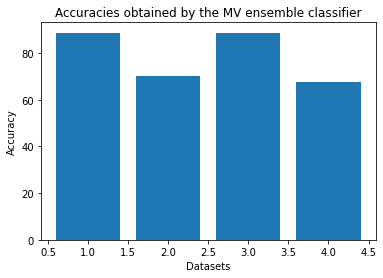

In [59]:
plt.bar([1,2,3,4], ensemble_accuracies)
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.title("Accuracies obtained by the MV ensemble classifier")

print(ensemble_accuracies)

### 3.b. Weighted majority voting rule WMV

In [97]:
def WeightedMajorityVoting(data_x, data_y, weights=[1, 1, 1]):
    """
    The weights are for HT, KNN, and NB, respectively
    """
    
    # First, initialize the classifiers
    ht = HoeffdingTreeClassifier()
    knn = KNNClassifier(n_neighbors=15, max_window_size=5000, leaf_size=40)
    nb = NaiveBayes()

    # Separate the dataset into train and test sets (ratio is 80:20)
    train_x_1_a = data_x[:16000]
    test_x_1_a = data_x[16000:]

    train_y_1_a = data_y[:16000]
    test_y_1_a = data_y[16000:]

    # Second, fit the classifiers with the first dataset's training set
    ht.fit(train_x_1_a, train_y_1_a)
    knn.fit(train_x_1_a, train_y_1_a)
    nb.fit(train_x_1_a, train_y_1_a)

    # Make predictions by using the three classifiers
    ht_prediction = ht.predict(test_x_1_a)
    knn_prediction = knn.predict(test_x_1_a)
    nb_prediction = nb.predict(test_x_1_a)
    
    majority_predictions = []

    # Select the prediction with the highest frequency as the final prediction
    for i in range(4000): # There are 4000 predictions
        one_count = 0
        zero_count = 0

        if ht_prediction[i] == 0:
            zero_count += 1 * weights[0]
        else:
            one_count += 1 * weights[0]

        if knn_prediction[i] == 0:
            zero_count += 1 * weights[1]
        else:
            one_count += 1 * weights[1]

        if nb_prediction[i] == 0:
            zero_count += 1 * weights[2]
        else:
            one_count += 1 * weights[2]

        if zero_count > one_count:
            majority_predictions.append(0)
        else:
            majority_predictions.append(1)    

    majority_predictions = np.array(majority_predictions)
    
    # Calculate the accuracy
    correct_count = 0
    for i in range(4000):
        if majority_predictions[i] == test_y_1_a[i]:
            correct_count += 1
    
    return correct_count / 4000 * 100

In [98]:
wmv_accuracies = []

#### WMV for the first dataset

In [99]:
acc = WeightedMajorityVoting(x_1_a, y_1_a, weights=[3, 7, 10])
print(f"With the first dataset, Accuracy of the weighted majority voting rule is: {acc:.2f}%")
wmv_accuracies.append(acc)

With the first dataset, Accuracy of the weighted majority voting rule is: 89.15%


#### WMV for the second dataset

In [100]:
acc = WeightedMajorityVoting(x_1_b, y_1_b, weights=[3, 7, 10])
print(f"With the second dataset, Accuracy of the weighted majority voting rule is: {acc:.2f}%")
wmv_accuracies.append(acc)

With the second dataset, Accuracy of the weighted majority voting rule is: 70.05%


#### WMV for the third dataset

In [101]:
acc = WeightedMajorityVoting(x_1_c, y_1_c, weights=[3, 7, 10])
print(f"With the third dataset, Accuracy of the weighted majority voting rule is: {acc:.2f}%")
wmv_accuracies.append(acc)

With the third dataset, Accuracy of the weighted majority voting rule is: 88.80%


#### WMV for the fourth dataset

In [102]:
acc = WeightedMajorityVoting(x_1_d, y_1_d, weights=[3, 7, 10])
print(f"With the fourth dataset, Accuracy of the weighted majority voting rule is: {acc:.2f}%")
wmv_accuracies.append(acc)

With the fourth dataset, Accuracy of the weighted majority voting rule is: 68.40%


[89.14999999999999, 70.05, 88.8, 68.4]


Text(0.5, 1.0, 'Accuracies obtained by the WMV ensemble classifier')

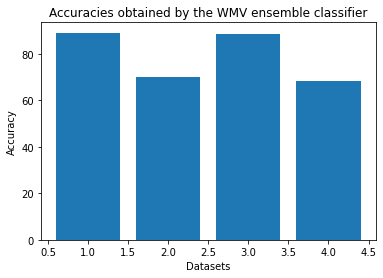

In [103]:
print(wmv_accuracies)
plt.bar([1,2,3,4], wmv_accuracies)
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.title("Accuracies obtained by the WMV ensemble classifier")



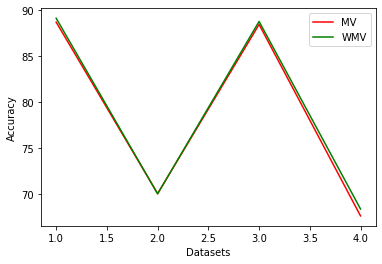

In [104]:
plt.plot([1,2,3,4], ensemble_accuracies, 'r', label="MV")
plt.plot([1,2,3,4], wmv_accuracies, 'g', label="WMV")
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.legend()
plt.show()